#### Maestría en Inteligencia de Negocios y Análisis de Datos
#### Tercer Trimestre, 2023
#### Laboratorio #2 – Text Mining & Image Recognition
#### Marvin Chávez 08105031
##### Instrucciones: A continuación, vera una lista de ejercicios que debe completar para poder entregar el laboratorio #1. Su solución deberá realizarla en un mismo Notebook indicando cada uno de los ejercicios y la salida correspondiente. Al finalizar deberá subir su solución a su repositorio de github y entregar en el GES link de dicho repositorio.

##### Problema 1: Desarrolle una funci´on que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def visualize_3D_image(img):
   
    x = np.linspace(0, img.shape[1]-1, img.shape[1])
    y = np.linspace(0, img.shape[0]-1, img.shape[0])
    x, y = np.meshgrid(x, y)

    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')


    ax.plot_surface(x, y, img, cmap='gray')


    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad')
    ax.set_title('Visualización 3D de la Imagen en Escala de Grises')


    plt.show()


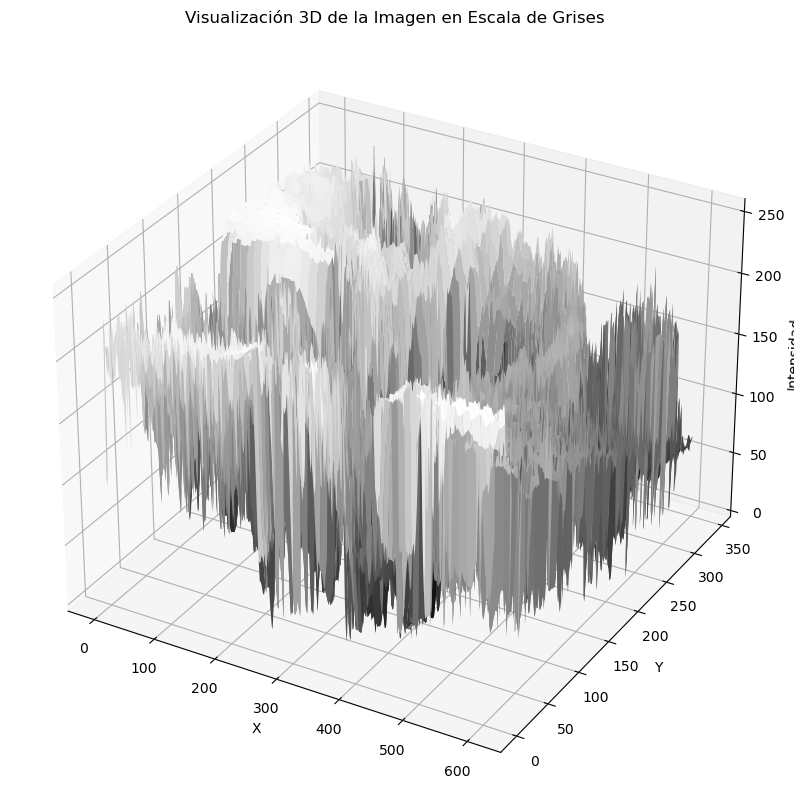

In [5]:
img = cv2.imread("perro.jpg", cv2.IMREAD_GRAYSCALE)


visualize_3D_image(img)

##### Problema #2: Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

In [6]:
img = cv2.imread("perro.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 

In [13]:
def negative_transform(image):
    transformed = 255 - image
    plt.imshow(transformed, cmap='gray')
    plt.title('Negative Transformation')
    plt.show()
    return transformed

def linear_transform(image, a=1, b=0):
    transformed = cv2.convertScaleAbs(image * a + b)
    plt.imshow(transformed, cmap='gray')
    plt.title('Linear Transformation')
    plt.show()
    return transformed

def logarithmic_transform(image, c=1):
    transformed = c * np.log1p(image.astype(np.float32))
    transformed = cv2.normalize(transformed, None, 0, 255, cv2.NORM_MINMAX)
    transformed = np.uint8(transformed)
    
    plt.imshow(transformed, cmap='gray')
    plt.title('Logarithmic Transformation')
    plt.show()
    return transformed


def exponential_transform(image, a=1, y=1):
    normalized_image = image.astype(np.float32) / 255.0
    transformed = a * np.power(normalized_image, y)
    transformed_scaled = (transformed * 255).astype(np.uint8)
    plt.imshow(transformed_scaled, cmap='gray')
    plt.title('Exponential Transformation')
    plt.show()
    
    return transformed_scaled


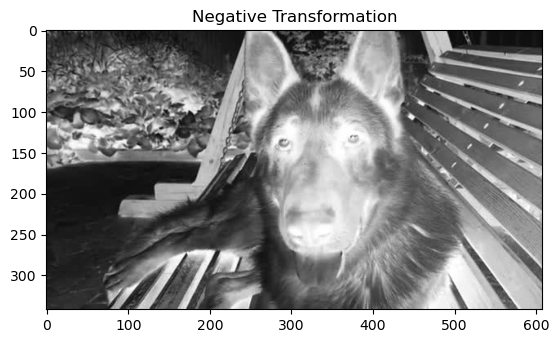

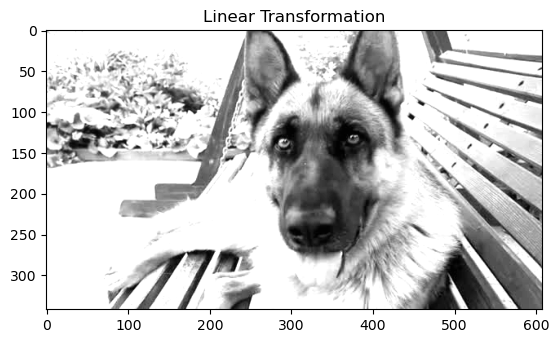

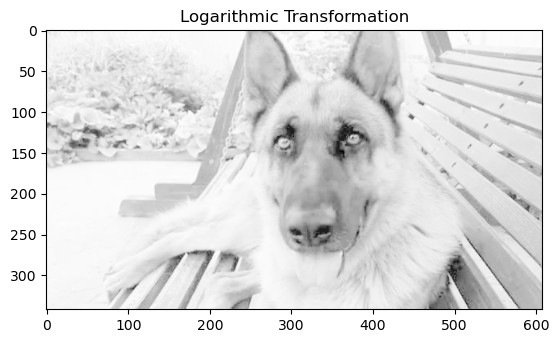

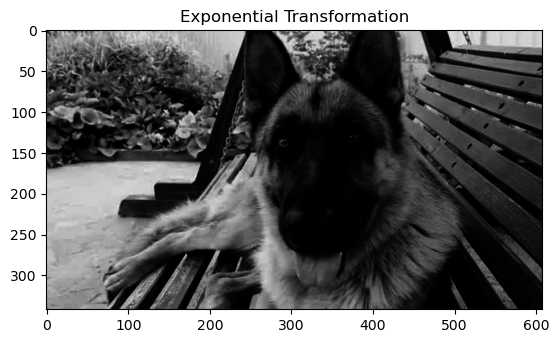

In [16]:
negative_img = negative_transform(gray)
linear_img = linear_transform(gray, a=1.5, b=20)
logarithmic_img = logarithmic_transform(gray,c=10 )
exponential_img = exponential_transform(gray, a=1, y=3)



##### Problema #3:
##### Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [29]:
pr3perro = cv2.imread("Problema3-perro.jpg")
pr3perro = cv2.cvtColor(pr3perro, cv2.COLOR_BGR2RGB)
pr3perrogray = cv2.cvtColor(pr3perro, cv2.COLOR_RGB2GRAY) 

pr3fondo = cv2.imread("Problema3-fondo.jpg")
pr3fondo = cv2.cvtColor(pr3fondo, cv2.COLOR_BGR2RGB)
pr3fondogray = cv2.cvtColor(pr3fondo, cv2.COLOR_RGB2GRAY) 


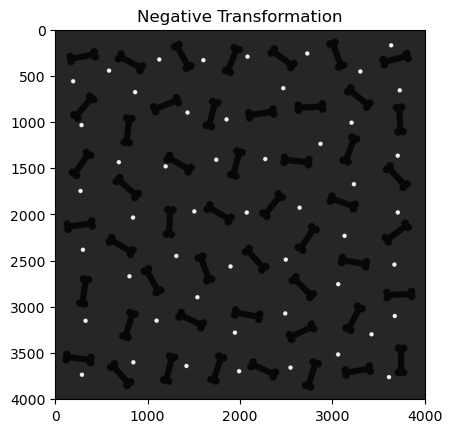

In [101]:
pr3fondogray = negative_transform(pr3fondogray)


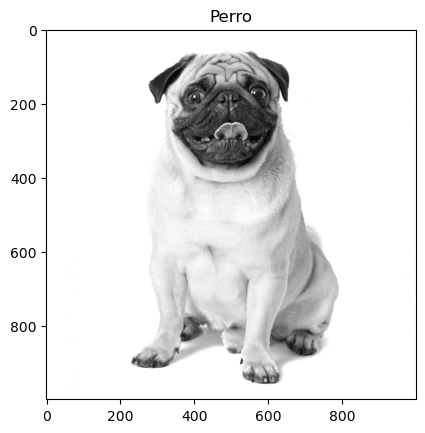

In [102]:

plt.imshow(pr3perrogray, cmap='gray')
plt.title('Perro')
plt.show()

In [45]:
def resize_to_smallest(img1, img2):
    """
    Redimensiona dos imágenes al tamaño de la imagen más pequeña.
    
    Parámetros:
    - img1: Primera imagen.
    - img2: Segunda imagen.
    
    Retorna:
    - img1_resized, img2_resized: Imágenes redimensionadas.
    """
    
    # Verificar si las imágenes tienen el mismo tamaño
    if img1.shape == img2.shape:
        print("Las imágenes tienen el mismo tamaño.")
        return img1, img2
    else:
        print("Las imágenes NO tienen el mismo tamaño.")
        
        # Determinar cuál imagen es la más pequeña
        if img1.shape < img2.shape:
            smaller_shape = img1.shape
        else:
            smaller_shape = img2.shape
        
        # Redimensionar las imágenes al tamaño de la imagen más pequeña
        img1_resized = cv2.resize(img1, (smaller_shape[1], smaller_shape[0]))
        img2_resized = cv2.resize(img2, (smaller_shape[1], smaller_shape[0]))
        
        print("Las imágenes han sido redimensionadas al mismo tamaño.")
        return img1_resized, img2_resized


In [68]:
# Se manipulan para poder realizar una verificación del tamaño para trabajar con las transformaciones
im1, im2 = resize_to_smallest(pr3perrogray, pr3fondogray)

Las imágenes NO tienen el mismo tamaño.
Las imágenes han sido redimensionadas al mismo tamaño.


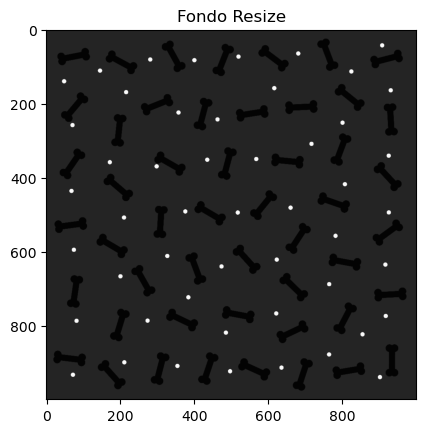

In [105]:

plt.imshow(im2, cmap='gray')
plt.title('Fondo Resize')
plt.show()

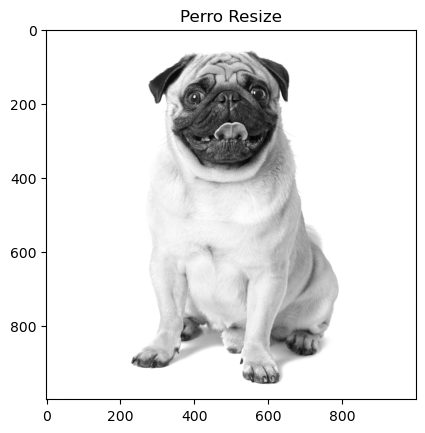

In [106]:

plt.imshow(im1, cmap='gray')
plt.title('Perro Resize')
plt.show()

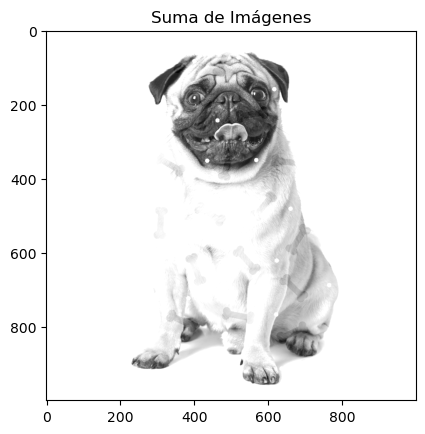

In [53]:

summed_image = cv2.add(img2, img1)

plt.imshow(summed_image, cmap='gray')
plt.title('Suma de Imágenes')
plt.show()

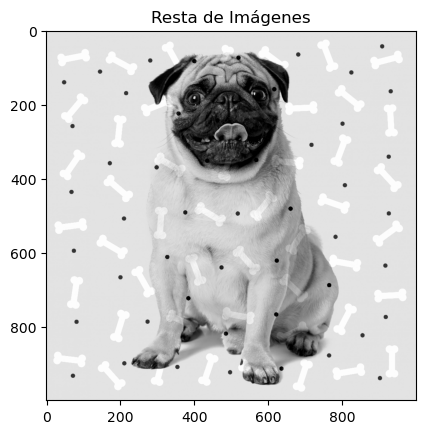

In [54]:

subtracted_image = cv2.subtract(img1, img2)

plt.imshow(subtracted_image, cmap='gray')
plt.title('Resta de Imágenes')
plt.show()

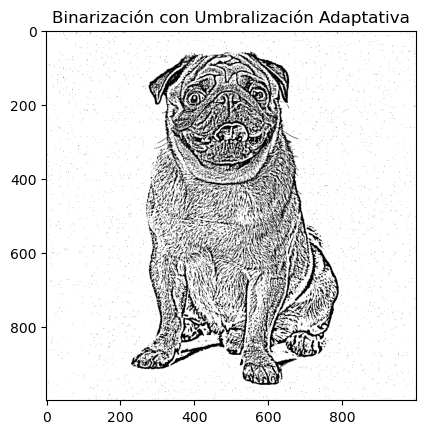

In [60]:
binary_image_adaptive_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(binary_image_adaptive_img1, cmap='gray')
plt.title('Binarización con Umbralización Adaptativa')
plt.show()


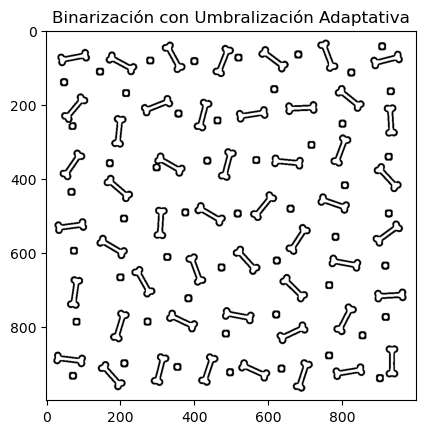

In [62]:
binary_image_adaptive_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(binary_image_adaptive_img2, cmap='gray')
plt.title('Binarización con Umbralización Adaptativa')
plt.show()


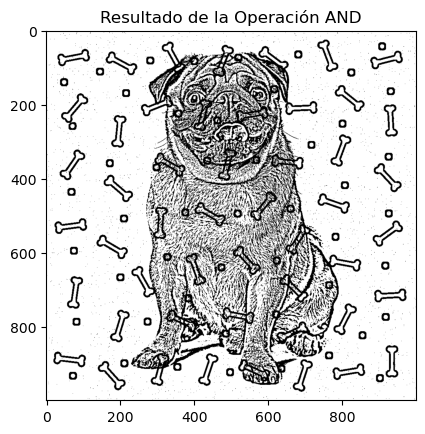

In [63]:
and_result = cv2.bitwise_and(binary_image_adaptive_img1, binary_image_adaptive_img2)

plt.imshow(and_result, cmap='gray')
plt.title('Resultado de la Operación AND')
plt.show()


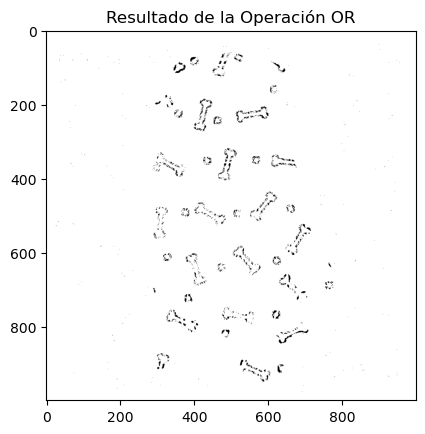

In [65]:
or_result = cv2.bitwise_or(binary_image_adaptive_img2, binary_image_adaptive_img1)

plt.imshow(or_result, cmap='gray')
plt.title('Resultado de la Operación OR')
plt.show()


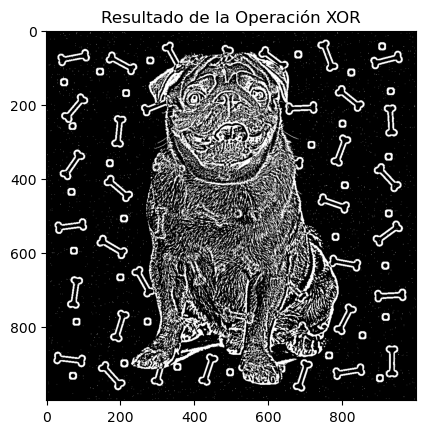

In [66]:
xor_result = cv2.bitwise_xor(binary_image_adaptive_img1, binary_image_adaptive_img2)

plt.imshow(xor_result, cmap='gray')
plt.title('Resultado de la Operación XOR')
plt.show()


##### Def FINAL 

In [70]:
def image_operations(img1, img2, operation):
    """
    Realiza una operación específica en dos imágenes y muestra el resultado.
    
    Parámetros:
    - img1: Primera imagen.
    - img2: Segunda imagen.
    - operation: Operación a realizar (SUMA, RESTA, AND, OR, XOR).
    """
    
    if operation == "SUMA":
        result = cv2.add(img1, img2)
        title = 'Suma de Imágenes'
        
    elif operation == "RESTA":
        result = cv2.subtract(img1, img2)
        title = 'Resta de Imágenes'
        
    elif operation in ["AND", "OR", "XOR"]:
        # Binarizar las imágenes para operaciones lógicas
        binary_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
        binary_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
        
        if operation == "AND":
            result = cv2.bitwise_and(binary_img1, binary_img2)
            title = 'Resultado de la Operación AND'
            
        elif operation == "OR":
            result = cv2.bitwise_or(binary_img1, binary_img2)
            title = 'Resultado de la Operación OR'
            
        elif operation == "XOR":
            result = cv2.bitwise_xor(binary_img1, binary_img2)
            title = 'Resultado de la Operación XOR'
            
    else:
        print("Operación no reconocida.")
        return
    
    # Mostrar el resultado
    plt.imshow(result, cmap='gray')
    plt.title(title)
    plt.show()


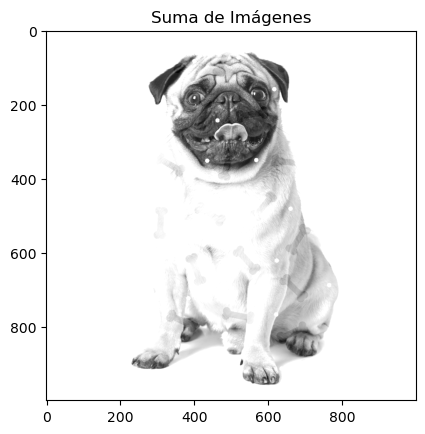

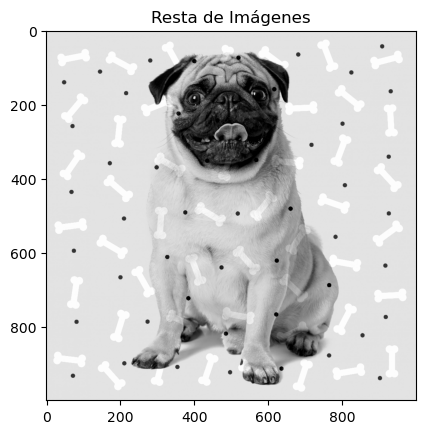

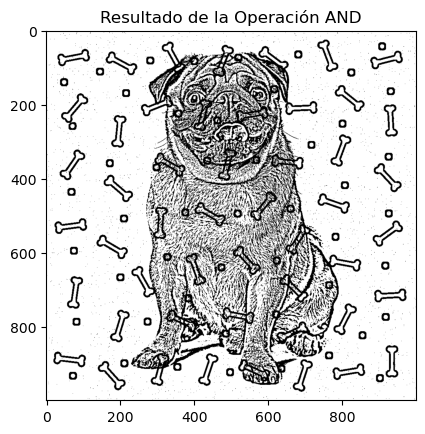

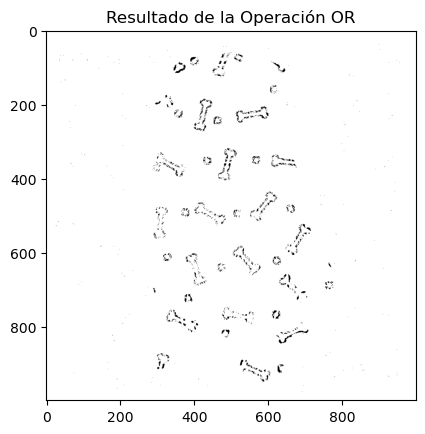

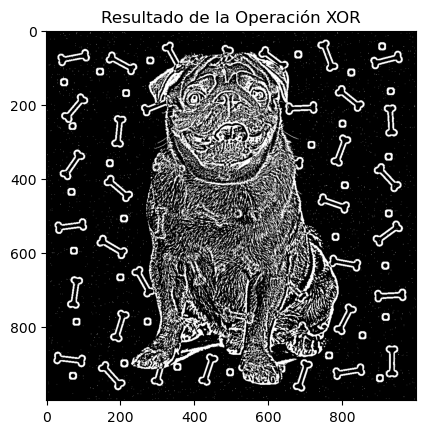

In [71]:
# Uso de la función
image_operations(im1, im2, "SUMA")
image_operations(im1, im2, "RESTA")
image_operations(im1, im2, "AND")
image_operations(im1, im2, "OR")
image_operations(im1, im2, "XOR")

##### Problema #4:
##### Realice una comparación entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV y cualquier imagen, como entregable debe mostrar una comparación entre los tres enfoques con una tabla donde se muestre las ventajas y desventajas de cada enfoque.


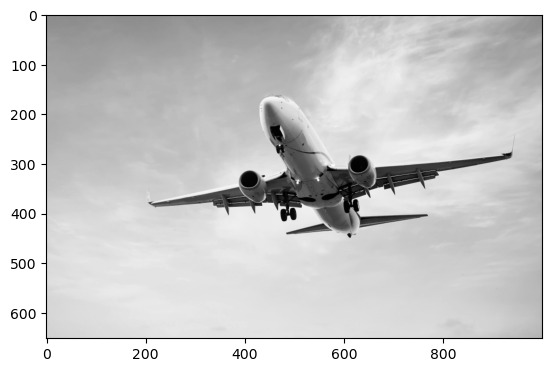

In [72]:
strImg = "avion.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

##### Filtro Gaussiano para Reducción de Ruido

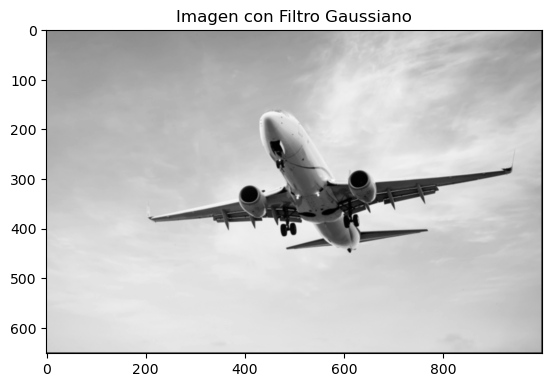

In [74]:
def convolutional_filter(imagen, kernel):
    alto = imagen.shape[0]
    ancho =  imagen.shape[1]
    altoKernel = len(kernel[:,0])
    anchoKernel = len(kernel[0,:])
    step = int(len(kernel[0,:])/2)
    newImg = np.zeros((alto, ancho, 1))
    for i in range(step, alto - step):
        newPixel = 0
        for j in range(step, ancho - step):
            ventana = imagen[i-step:i+2*step, j-step:j+2*step]
            newPixel = 0
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    newPixel = newPixel + ventana[m, n] * kernel[m, n]
            newImg[i, j] = int(newPixel)
    return newImg

kernel = np.array([[1/16., 2/16., 1/16.], [2/16., 4/16., 2/16.], [1/16., 2/16., 1/16.]])
img_gaussian = convolutional_filter(img, kernel)
plt.imshow(img_gaussian, cmap="gray")
plt.title("Imagen con Filtro Gaussiano")
plt.show()


##### Derivada en X

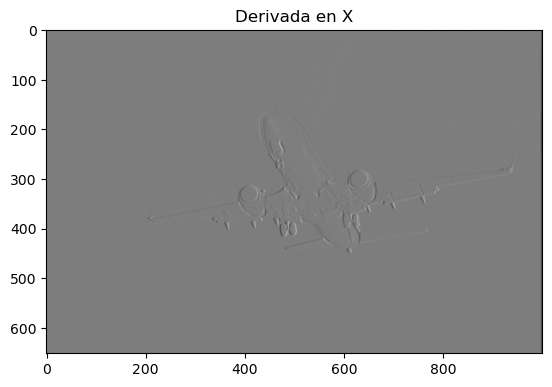

In [75]:
def derivadaX(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    DerivadaX = np.zeros((alto, ancho, 1))
    for i in range(0, alto):
        for j in range(0, ancho - 1):
            derX = img[i, j + 1] - img[i, j]
            DerivadaX[i, j] = derX
    return DerivadaX

imgDerX = derivadaX(img_gaussian)
plt.imshow(imgDerX, cmap="gray")
plt.title("Derivada en X")
plt.show()

##### Derivada en Y

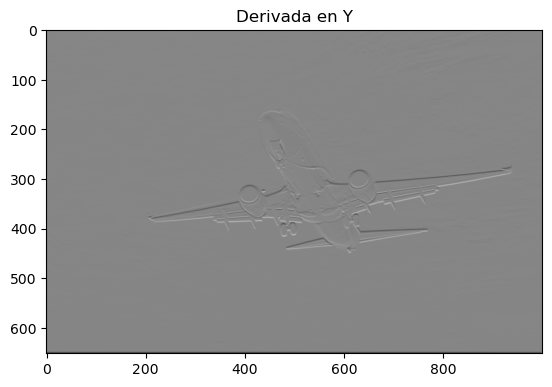

In [76]:
def derivadaY(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    DerivadaY = np.zeros((alto, ancho, 1))
    for i in range(0, alto - 1):
        for j in range(0, ancho):
            derY = img[i + 1, j] - img[i, j]
            DerivadaY[i, j] = derY
    return DerivadaY

imgDerY = derivadaY(img_gaussian)
plt.imshow(imgDerY, cmap="gray")
plt.title("Derivada en Y")
plt.show()

##### Magnitud del Gradiente

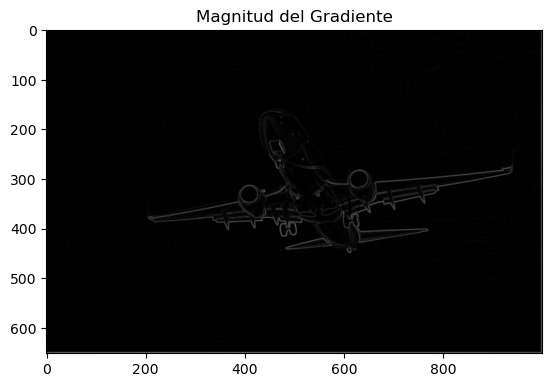

In [80]:
def magnitud(dx, dy):
    alto = dx.shape[0]
    ancho = dx.shape[1]
    salida = np.zeros((alto, ancho, 1))
    for i in range(0, alto):
        for j in range(0, ancho):
            mag = math.sqrt(dx[i,j]**2 + dy[i,j]**2)
            salida[i,j] = mag
    return salida

magnitudOut = magnitud(imgDerX, imgDerY)
plt.imshow(magnitudOut, cmap="gray")
plt.title("Magnitud del Gradiente")
plt.show()

##### Fase del Gradiente

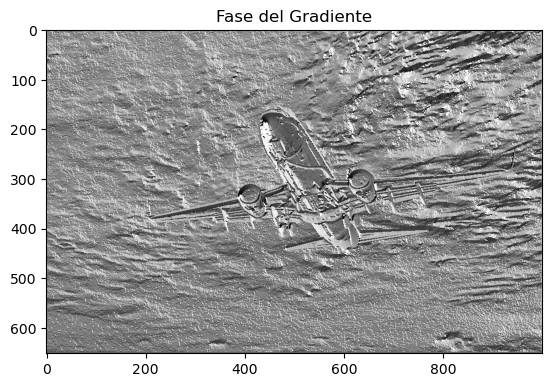

In [81]:
def fase(dx, dy):
    alto = dx.shape[0]
    ancho = dx.shape[1]
    salida = np.zeros((alto, ancho, 1))
    for i in range(0, alto):
        for j in range(0, ancho):
            fase_val = int((180/math.pi)*(math.atan2(dy[i,j], dx[i,j])))
            salida[i,j] = fase_val
    return salida

fasedOut = fase(imgDerX, imgDerY)
plt.imshow(fasedOut, cmap="gray")
plt.title("Fase del Gradiente")
plt.show()

#### Supresión de No Máximos

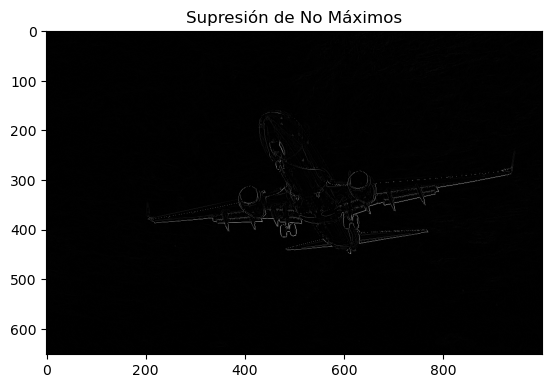

In [82]:
def non_maximum_suppression(magImage, phaseImage):
    alto = magImage.shape[0]
    ancho =  magImage.shape[1]
    newImg = np.zeros((alto, ancho,1))
    for i in range(1, alto - 2):
        for j in range(1, ancho - 2):
            ventana = magImage[i-1:i+2, j-1:j+2]
            angulo = phaseImage[i, j]
            if((angulo > 337)  or (angulo <= 23) or (angulo >= 157) and (angulo <= 203)):
                val1 = ventana[1,0]
                val2 = ventana[1,1]
                val3 = ventana[1,2]
            elif((angulo > 23) and (angulo <= 67) or (angulo > 203) and (angulo <= 248)):
                val1 = ventana[0,2]
                val2 = ventana[1,1]
                val3 = ventana[2,0]
            elif((angulo > 67) and (angulo <= 113) or (angulo > 248) and (angulo <= 293)):
                val1 = ventana[0,1]
                val2 = ventana[1,1]
                val3 = ventana[2,1]
            elif((angulo > 293) and (angulo <= 337) or (angulo > 113) and (angulo <= 157)):
                val1 = ventana[0,0]
                val2 = ventana[1,1]
                val3 = ventana[2,2]
            if(val2 >= val1 and val2 >= val3):
                newImg[i, j] = val2 
            else:
                newImg[i, j] = 0     
    return newImg

nmsOut = non_maximum_suppression(magnitudOut, fasedOut)
plt.imshow(nmsOut, cmap="gray")
plt.title("Supresión de No Máximos")
plt.show()

##### Umbralización y Resultado Final

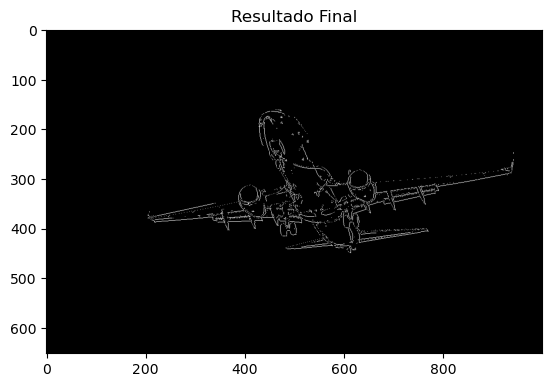

In [85]:
def threshold(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    cannyOut = np.zeros((alto, ancho, 1))
    for i in range(0, alto):
        for j in range(0, ancho):
            if(img[i,j] > 12):
                cannyOut[i,j] = 255
            else:
                cannyOut[i, j] = 0
    return cannyOut

cannyOut = threshold(nmsOut)
plt.imshow(cannyOut, cmap="gray")
plt.title("Resultado Final")
plt.show()



##### Canny

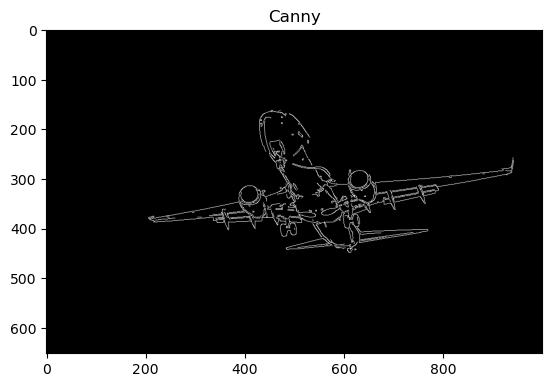

In [90]:
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap="gray")
plt.title("Canny")
plt.show()


##### SOBEL

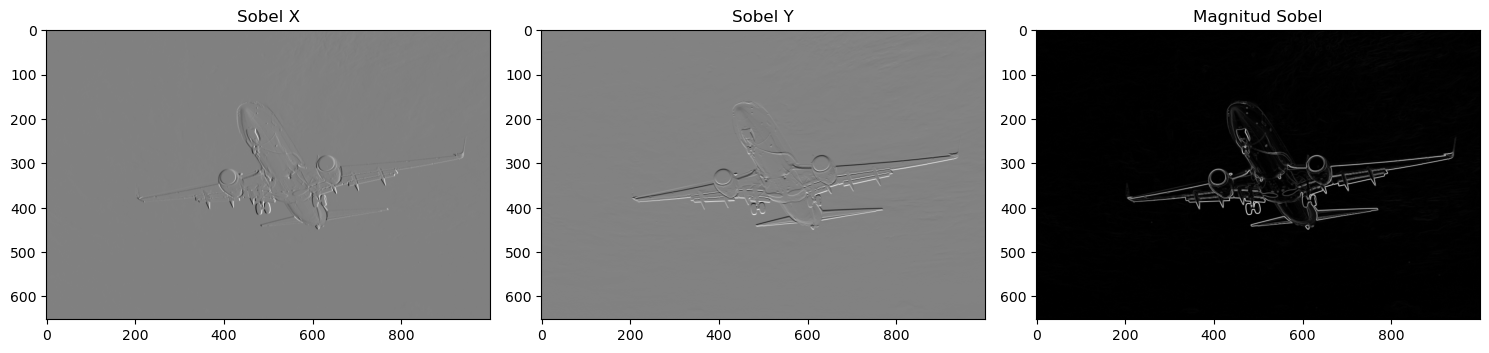

In [87]:
# Aplicar el operador Sobel en dirección X
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)

# Aplicar el operador Sobel en dirección Y
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calcular la magnitud combinada del gradiente
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Mostrar los resultados
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')

plt.subplot(1,3,2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')

plt.subplot(1,3,3)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Magnitud Sobel')

plt.tight_layout()
plt.show()

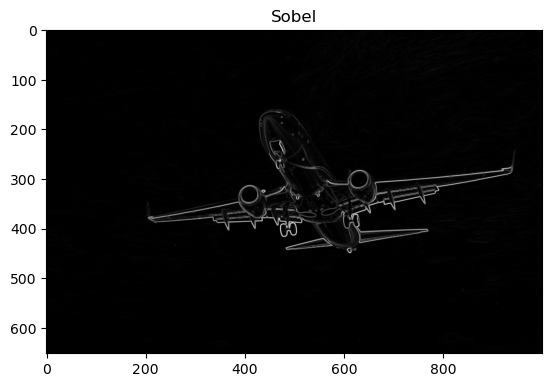

In [92]:

plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel')
plt.show()

##### Operador Laplaciano

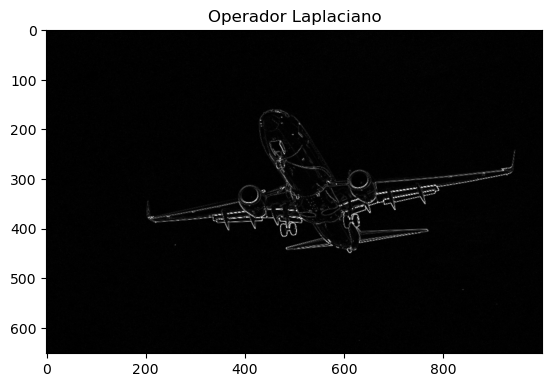

In [89]:

laplacian = cv2.Laplacian(img, cv2.CV_64F)

laplacian_abs = cv2.convertScaleAbs(laplacian)

plt.imshow(laplacian_abs, cmap='gray')
plt.title('Operador Laplaciano')
plt.show()


![Alt text](image.png)

#####  Problema #5: 
##### Utilizando funciones de OpenCV deberá aplicar los filtros de convolución de tamaño de kernel (3x3, 5x5 y 7x7) las operaciones que deberá realizar son las siguientes: 
##### •	Kernel Gaussiano de ruido. 
##### •	Kernel Box de ruido. 
##### •	Kernel de mediana para ruido. 
##### •	Kernel Sobel para detección de bornes (en X e Y). 
##### •	Kernel Lapaciano para detección de bordes. 
##### •	Kernel de realce (Sharpening). 
##### •	Kernel de relieve (Embossing)

##### •	Kernel Gaussiano de ruido. 

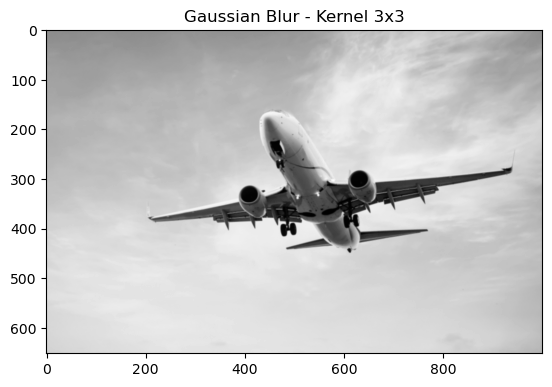

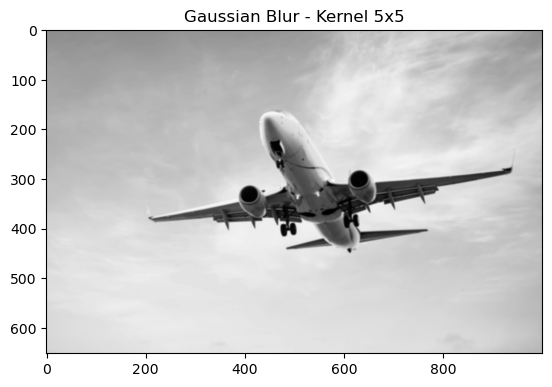

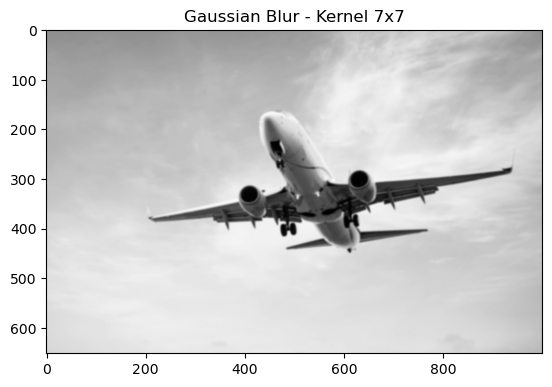

In [93]:
for ksize in [3, 5, 7]:
    blurred = cv2.GaussianBlur(img, (ksize, ksize), 0)
    plt.imshow(blurred, cmap="gray")
    plt.title(f"Gaussian Blur - Kernel {ksize}x{ksize}")
    plt.show()


##### •	Kernel Box de ruido. 

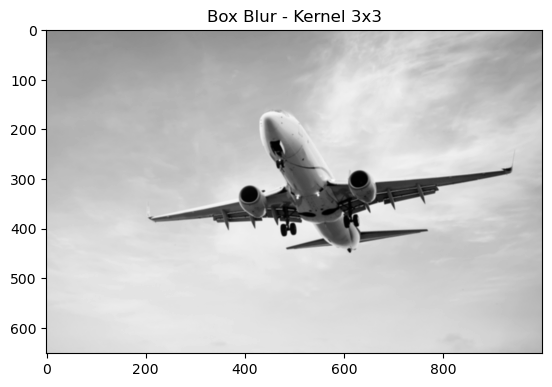

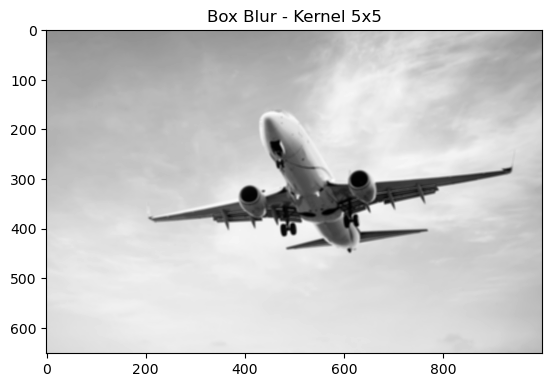

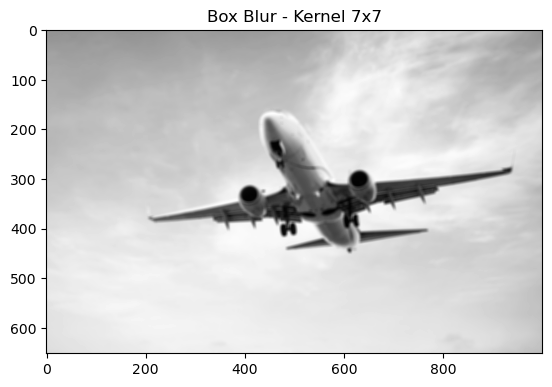

In [94]:
for ksize in [3, 5, 7]:
    blurred = cv2.blur(img, (ksize, ksize))
    plt.imshow(blurred, cmap="gray")
    plt.title(f"Box Blur - Kernel {ksize}x{ksize}")
    plt.show()


##### •	Kernel de mediana para ruido. 

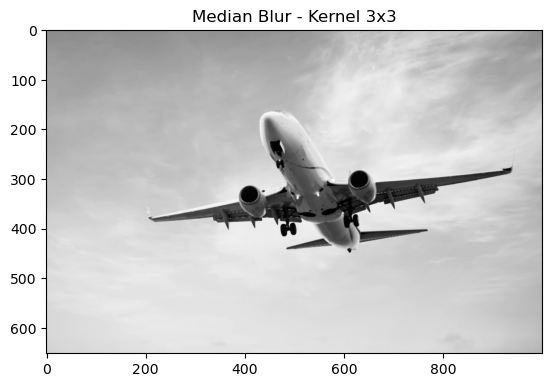

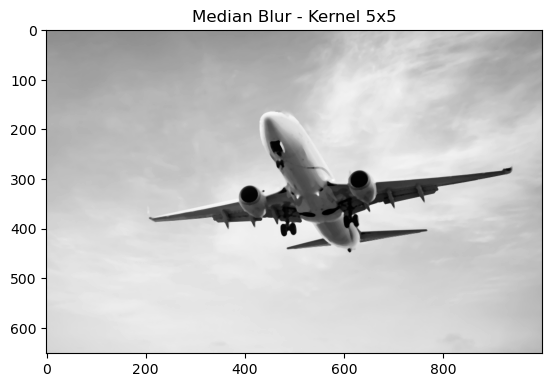

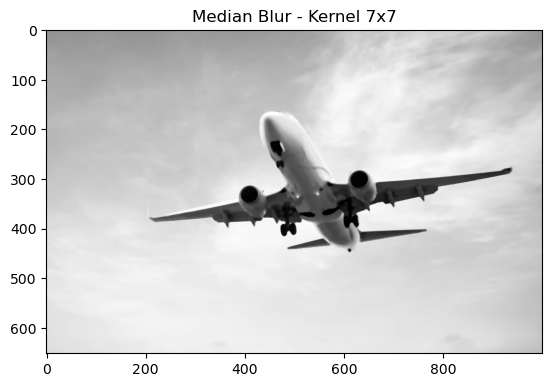

In [95]:
for ksize in [3, 5, 7]:
    median_blurred = cv2.medianBlur(img, ksize)
    plt.imshow(median_blurred, cmap="gray")
    plt.title(f"Median Blur - Kernel {ksize}x{ksize}")
    plt.show()


##### •	Kernel Sobel para detección de bornes (en X e Y). 

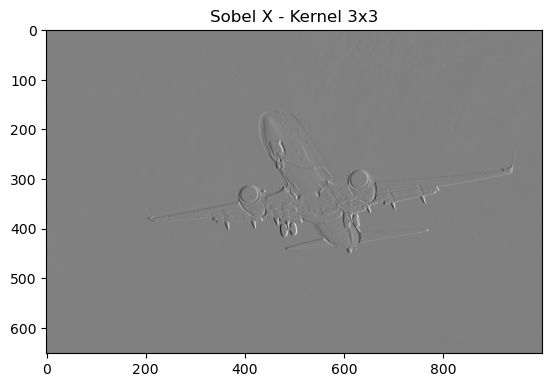

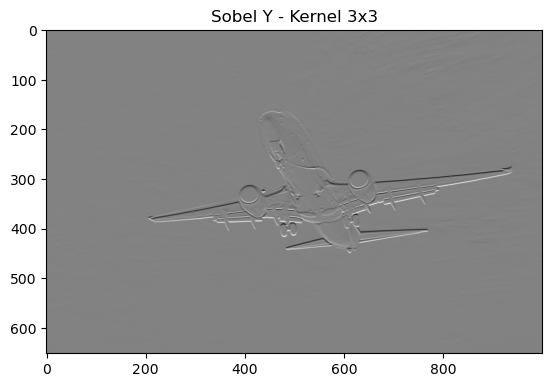

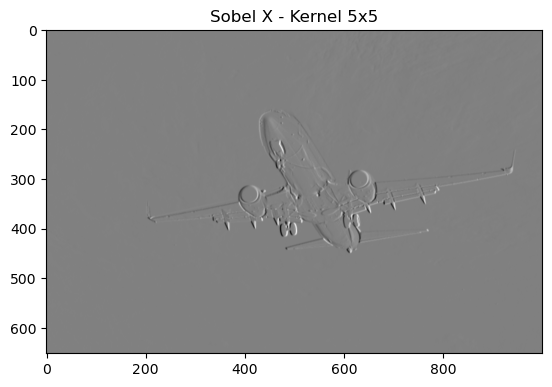

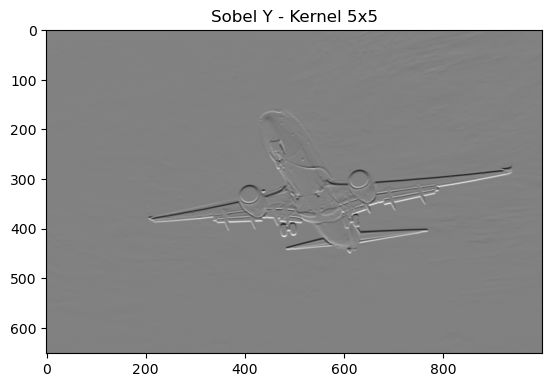

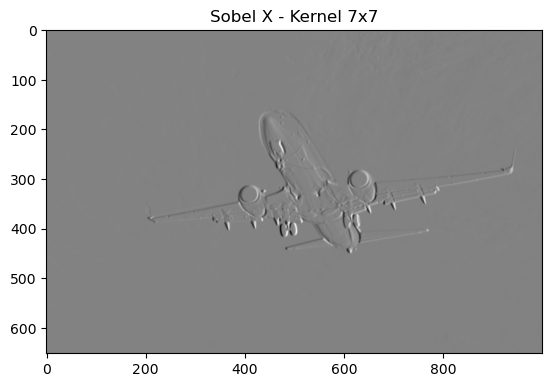

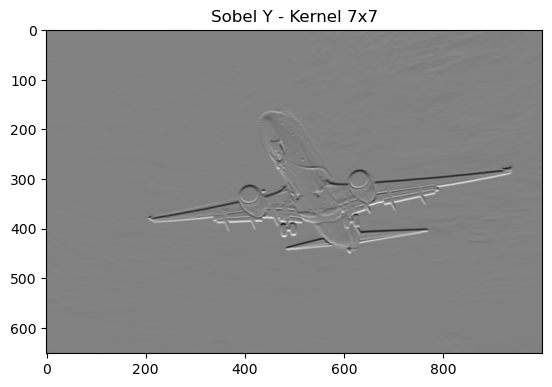

In [96]:
for ksize in [3, 5, 7]:
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=ksize)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=ksize)
    plt.imshow(sobelx, cmap="gray")
    plt.title(f"Sobel X - Kernel {ksize}x{ksize}")
    plt.show()
    plt.imshow(sobely, cmap="gray")
    plt.title(f"Sobel Y - Kernel {ksize}x{ksize}")
    plt.show()


##### •	Kernel Lapaciano para detección de bordes. 

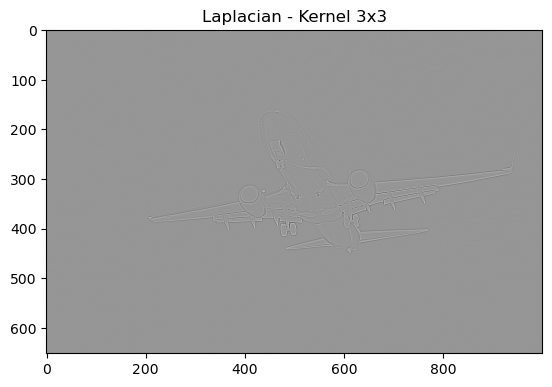

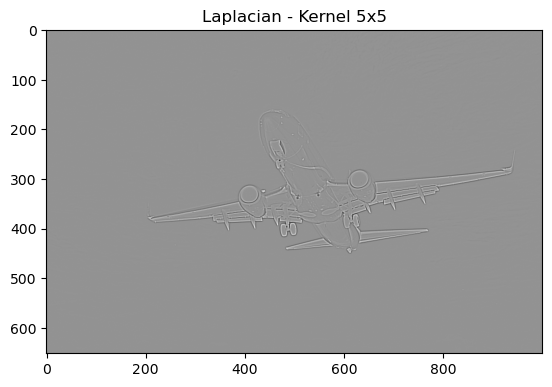

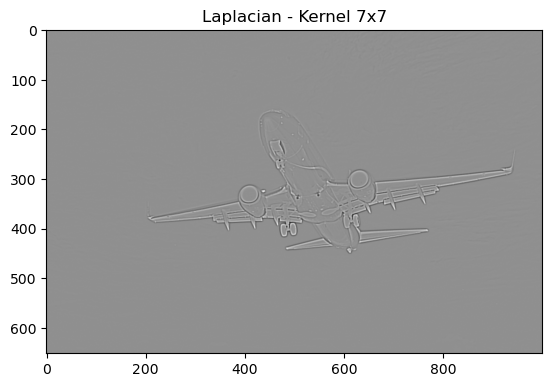

In [97]:
for ksize in [3, 5, 7]:
    laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=ksize)
    plt.imshow(laplacian, cmap="gray")
    plt.title(f"Laplacian - Kernel {ksize}x{ksize}")
    plt.show()


##### •	Kernel de realce (Sharpening). 

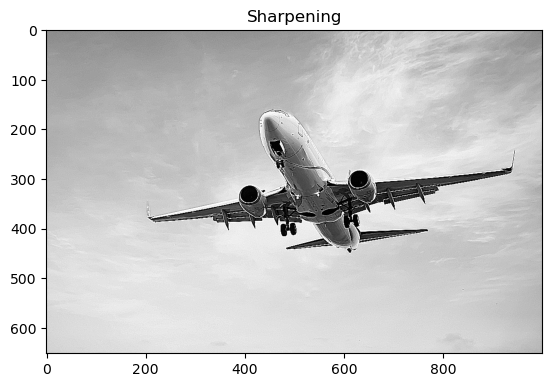

In [98]:
sharpening_kernel = np.array([[-1, -1, -1], 
                              [-1,  9, -1],
                              [-1, -1, -1]])
sharpened = cv2.filter2D(img, -1, sharpening_kernel)
plt.imshow(sharpened, cmap="gray")
plt.title("Sharpening")
plt.show()


##### •	Kernel de relieve (Embossing)

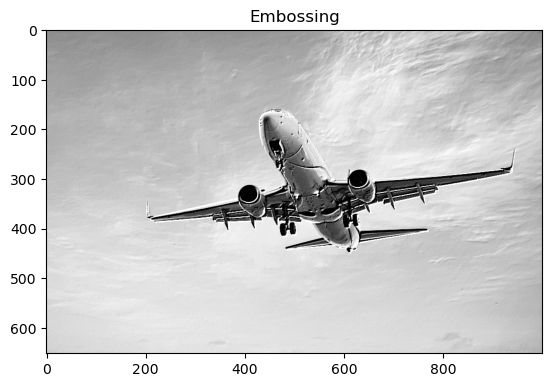

In [99]:
embossing_kernel = np.array([[-2, -1, 0], 
                             [-1,  1, 1],
                             [ 0,  1, 2]])
embossed = cv2.filter2D(img, -1, embossing_kernel)
plt.imshow(embossed, cmap="gray")
plt.title("Embossing")
plt.show()
